In [2]:
import itertools
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [3]:
def words(file):
    with open(file) as f:
        next(f)
        for line in f:
            yield line.split('/')[0]

In [4]:
lv_first_letter_stats = Counter(w[0].lower() for w in words('lv_LV.dic'))

In [5]:
lv_first_letter_stats.most_common(10)

[('p', 10609),
 ('a', 7425),
 ('s', 6898),
 ('i', 4891),
 ('k', 4112),
 ('n', 3720),
 ('d', 3332),
 ('m', 3080),
 ('t', 2537),
 ('v', 2417)]

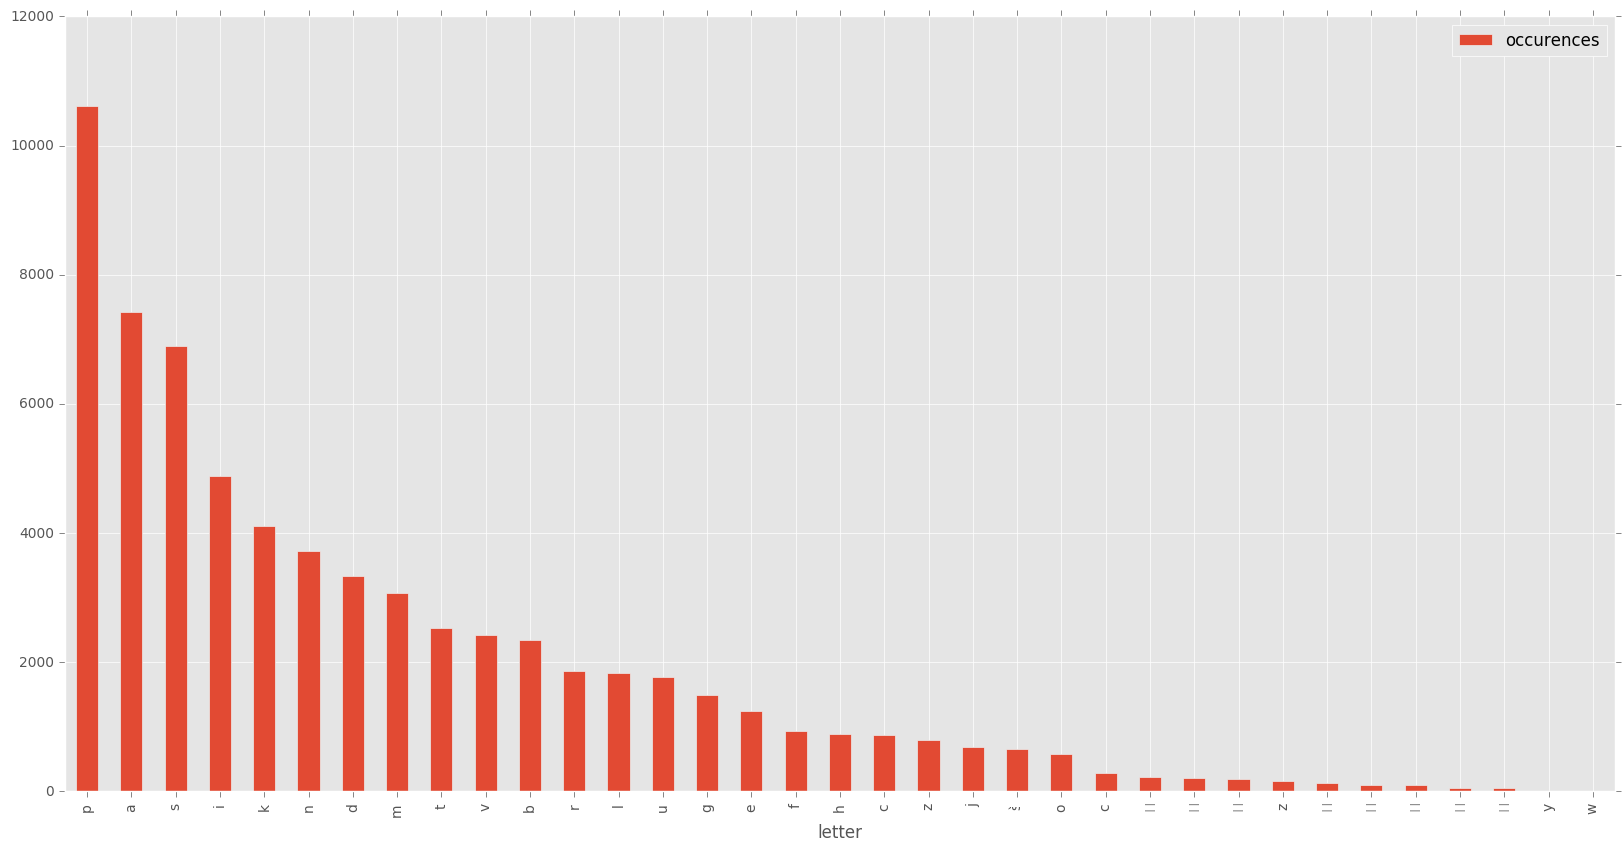

In [6]:
lv_first_letter_df = pd.DataFrame(list(lv_first_letter_stats.items()), columns=['letter', 'occurences']).set_index('letter')
lv_first_letter_df =lv_first_letter_df.sort_values(by='occurences', ascending=False)
lv_first_letter_df.plot(kind='bar',  figsize=(20, 10))

In [7]:
et_first_letter_stats = Counter(w[0].lower() for w in words('et_EE.dic'))

In [8]:
et_first_letter_stats.most_common(10)

[('k', 51162),
 ('p', 26909),
 ('s', 24875),
 ('v', 22108),
 ('t', 21760),
 ('l', 20782),
 ('m', 17195),
 ('h', 13772),
 ('r', 13309),
 ('a', 12986)]

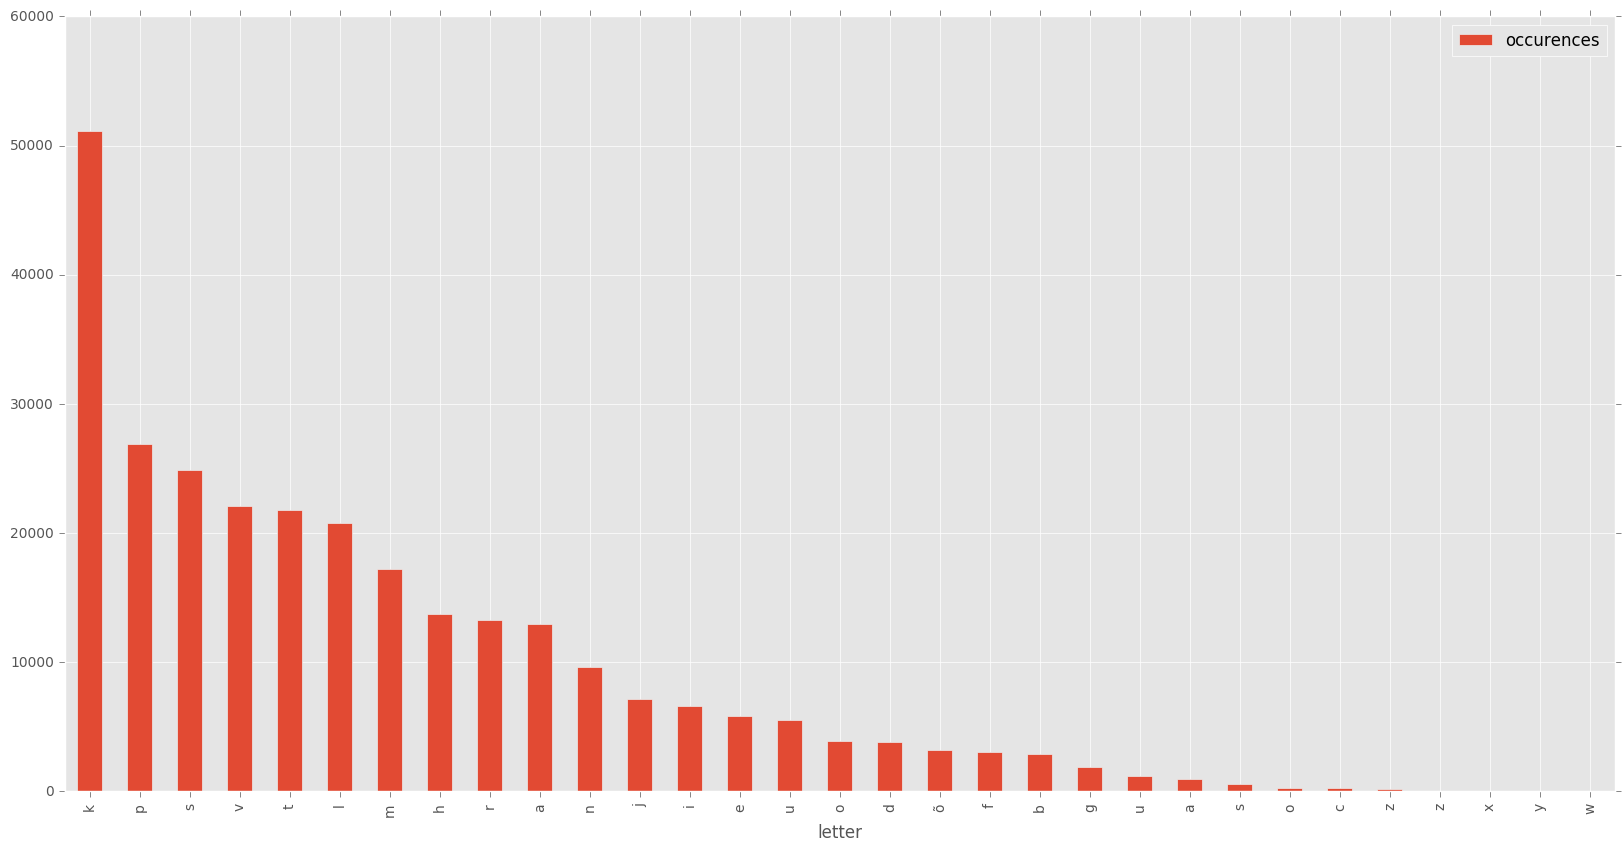

In [9]:
et_first_letter_df = pd.DataFrame(list(et_first_letter_stats.items()), columns=['letter', 'occurences']).set_index('letter')
et_first_letter_df =et_first_letter_df.sort_values(by='occurences', ascending=False)
et_first_letter_df.plot(kind='bar', figsize=(20, 10))

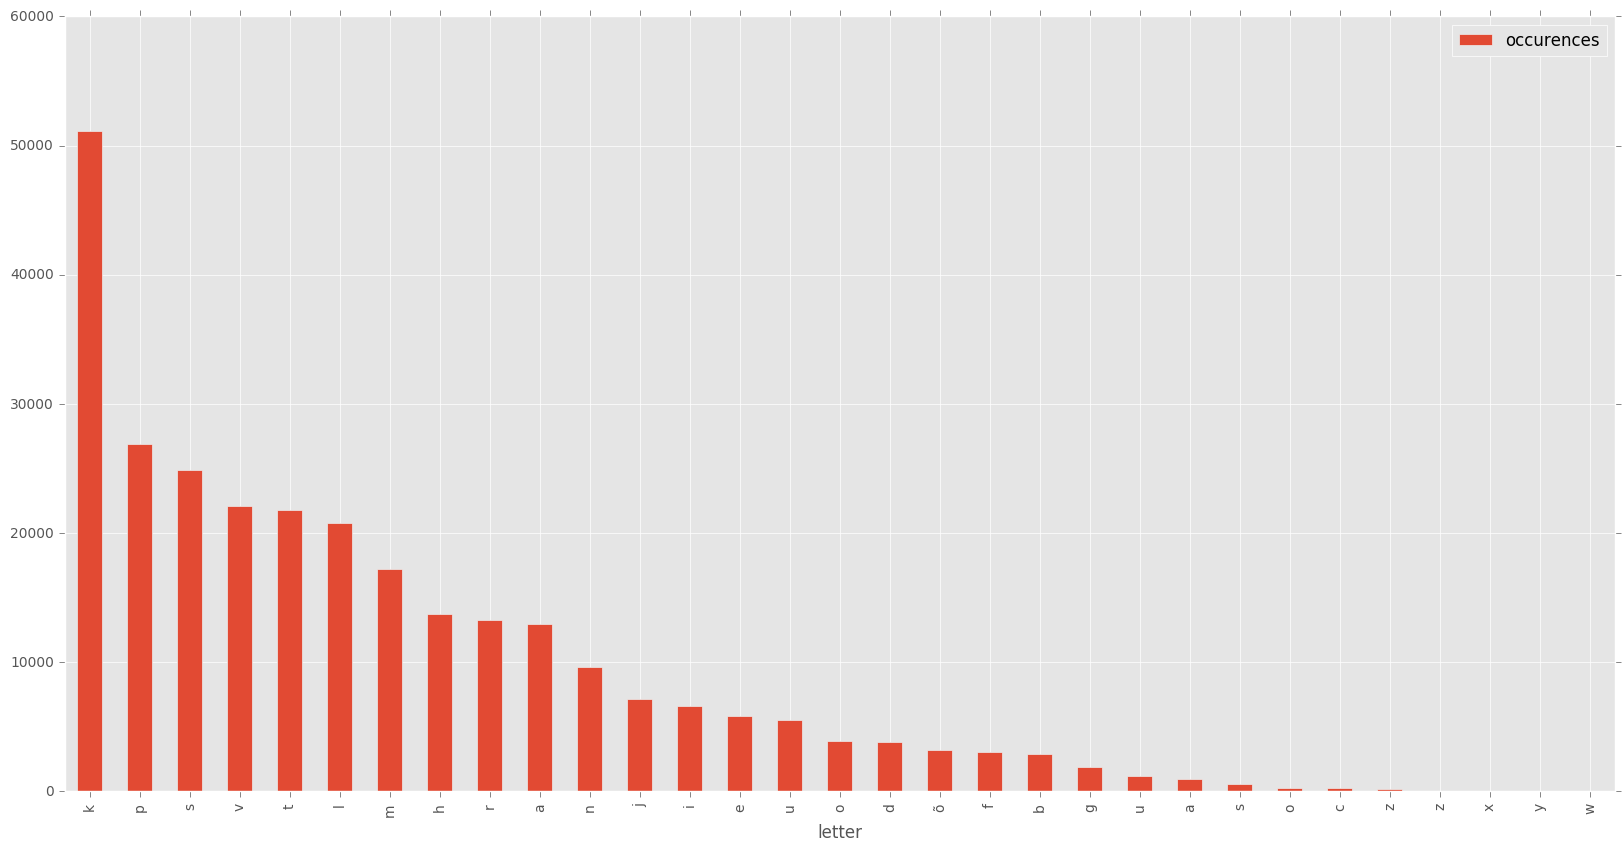

In [10]:
et_first_letter_df.plot(kind='bar', figsize=(20, 10))

In [11]:
similar_words = set(words('et_EE.dic')) & set(words('lv_LV.dic'))
similar_words

{'EUR',
 'GB',
 'GHz',
 'HTML',
 'Hz',
 'LVL',
 'MB',
 'MHz',
 'TB',
 'abi',
 'abrakadabra',
 'ai',
 'aina',
 'aita',
 'aka',
 'akna',
 'akropole',
 'akustika',
 'ala',
 'albatross',
 'alfa',
 'algebra',
 'alibi',
 'alpaka',
 'alus',
 'ambra',
 'amfora',
 'anakonda',
 'anglistika',
 'antiseptika',
 'apendiks',
 'aplausi',
 'apse',
 'arhitekte',
 'arnika',
 'aseptika',
 'ass',
 'aste',
 'astma',
 'astronautika',
 'atlase',
 'atlass',
 'au',
 'auka',
 'aula',
 'aura',
 'aut',
 'auto',
 'avanss',
 'balalaika',
 'balanss',
 'balle',
 'ballistika',
 'bandžo',
 'baranka',
 'bass',
 'boa',
 'boss',
 'brass',
 'bruto',
 'bulla',
 'burka',
 'buss',
 'daina',
 'dekadents',
 'delta',
 'diafragma',
 'diagnostika',
 'dialektika',
 'didaktika',
 'dilemma',
 'dingo',
 'diplomande',
 'dividende',
 'dogma',
 'ego',
 'eh',
 'ei',
 'eklektika',
 'ekliptika',
 'ekskurss',
 'eksterne',
 'ekstra',
 'ekvilibristika',
 'ekvivalents',
 'elegants',
 'embargo',
 'emu',
 'esperanto',
 'facto',
 'fajanss',
 'fanta

In [12]:
len(similar_words)

473

In [13]:
import os
import requests

In [14]:
API_KEY = os.environ['TRANSLATE_API_KEY']
r = requests.get('https://www.googleapis.com/language/translate/v2?q=Hello&source=et&target=en&key={API_KEY}'.format(API_KEY=API_KEY))

In [15]:
r.text

'{\n "data": {\n  "translations": [\n   {\n    "translatedText": "hello"\n   }\n  ]\n }\n}\n'

In [16]:
from itertools import 
for w in similar_words:
    print(w)

bandžo
fajanss
kalts
GHz
diafragma
laipa
vilks
HTML
pumpa
esperanto
gamma
firma
paprika
kimono
madeira
robot
ballistika
algebra
buss
tapete
akna
hei
ekvilibristika
madonna
dekadents
putra
kvass
vakants
tenge
LVL
hurma
mats
vistra
kost
farss
mono
reveranss
ala
bulla
inerts
oga
korts
transs
tips
kross
bass
geto
samba
ost
maita
tehnika
summa
mis
lemma
laka
keda
stereo
kanna
gaide
panga
kore
astronautika
meti
nekropole
heraldika
karst
MB
seanss
krusa
kulise
ekstra
jurta
boss
loks
pika
preambula
podagra
tarantella
antiseptika
haki
kB
klips
fantastika
arhitekte
perve
kompass
kompromiss
saart
impulss
astma
harakiri
paps
aina
pakete
vats
takse
logot
peristaltika
sile
metiss
kust
lats
koks
eklektika
fugass
vidus
radža
kamara
pele
lops
sala
aura
polka
dialektika
taktika
kase
GB
morss
gorilla
atlass
amfora
sega
naba
balanss
vaba
dividende
vaka
polo
svastika
polise
flegma
nulle
kvarts
indigo
pakalt
korda
kas
lai
folkloristika
dogma
alpaka
vilt
kilo
MHz
polis
makro
mana
kura
taksis
vaga
primadonna


In [22]:
r.json()['data']['translations'][0]['translatedText']

'hello'

In [23]:
def translate(words):
    endpoint = 'https://www.googleapis.com/language/translate/v2?q={word}&source={source}&target=en&key={API_KEY}'
    for w in words:
        et = requests.get(endpoint.format(word=w, source='et', API_KEY=API_KEY))
        lv = requests.get(endpoint.format(word=w, source='lv', API_KEY=API_KEY))
        yield w, et.json()['data']['translations'][0]['translatedText'], lv.json()['data']['translations'][0]['translatedText']

In [25]:
translations = pd.DataFrame(list(translate(similar_words)), columns=['word', 'et', 'lv']).set_index('word')

In [34]:
translations['common'] = translations['et'] == translations['lv']

In [40]:
translations.to_csv('translations.csv')

In [44]:
translations[translations['common'] == True]

,et,lv,common
word,,,
bandžo,banjo,banjo,True
fajanss,faience,faience,True
GHz,GHz,GHz,True
diafragma,diaphragm,diaphragm,True
HTML,HTML,HTML,True
gamma,gamma,gamma,True
paprika,paprika,paprika,True
kimono,kimono,kimono,True
robot,robot,robot,True
